# Lecture 21 - Numerical Differentiation

## Overview, Objectives, and Key Terms
 
In [Lecture 20](ME400_Lecture_20.ipynb), Taylor series were reviewed, and SymPy was used to define and study such series.  A key idea introduced was that a *truncated* Taylor series expansion of $f(x)$ about $x_0$ is (1) accurate near the point $x_0$ and (2) made better by including additional terms of the full series.  In this lesson, such truncated series are used to define **finite difference** approximations for derivatives.  Although good for some applications by themselves, finite-difference approximations are critical for solving differential equations numerically, a topic to be covered in several lectures.
 
### Objectives

By the end of this lesson, you should be able to

- Derive finite-difference approximations for first- and second-order derivatives using Taylor series.
- Apply SymPy to compute finite-difference approximations of arbitrary order for any derivative.
- Numerically/graphically/symbolically demonstrate that the error of an $n$th-order approximation as $\Delta \to 0$ exhibits the right behavior.

### Key Terms

- finite difference
- forward difference
- backward difference
- central difference
- truncation error
- first-order approximation
- second-order approximation
- $n$th-order approximation

## If, in the beginning, $h$ didn't go to 0...

Recall from [Lecture 19](ME400_Lecture_19.ipynb) that the derivative of $f(x)$ is

$$
  \frac{df}{dx} = \lim_{\Delta \to 0} \frac{f(x+\Delta)-f(x)}{\Delta} \, .
$$

Here, $h$ (the ubiquitous "step" used in calculus books around the world) is swapped for $\Delta$ (a better symbol that represents "small change").  What if that limit is not taken and, instead, a "small" value of $\Delta$ is used?  The result is our first **finite-difference** approximation, the **forward difference**:

$$
  f'(x) \approx  \frac{f(x+\Delta)-f(x)}{\Delta} \, .
$$

This is called the *forward* difference approximation because $f'(x)$ depends on information (1) at point $x$ and (2) to the right (or forward) of $x$ at $x+\Delta$.  Intuition suggests that this approximation improves with smaller $\Delta$. 

An equally valid approximation is the **backward difference**:
$$
  f'(x) \approx  \frac{f(x)-f(x-\Delta)}{\Delta} \, .
$$

***

**Exercise**: Use the forward-difference approximation to approximate the derivative of $e^x$ at $x = 1$ for $\Delta = 1, 0.1, 0.01, and 0.001$ and plot the error as a function of $\Delta$.

*Solution*:

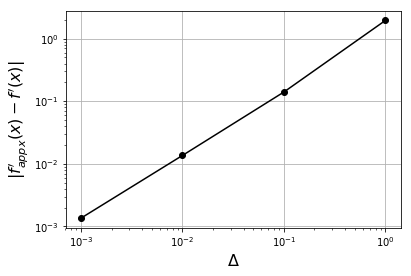

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = 1.0
fp_ref = np.exp(x) # fp for "f prime"
Delta = np.logspace(0, -3, 4)
fp_appx = np.zeros(len(Delta))
for i in range(len(Delta)):
    fp_appx[i] = (np.exp(x+Delta[i])-np.exp(x))/Delta[i]
plt.loglog(Delta, abs(fp_appx-fp_ref), 'k-o')
plt.xlabel('$\Delta$', fontsize=16)
plt.ylabel("$|f_{appx}'(x)-f'(x)|$", fontsize=16)
plt.grid(True)
plt.show()

***

**Exercise**: Repeat the previous exercise but use the *backward* difference.  Do you observe any difference?

***

**Exercise**: Apply the *central* difference to the function $f(x) = \sin(2x - 0.17) + 0.3 \cos(3.4x + 0.1)$ at $x = 0.5$. Plot the error for $\Delta = 10^{-1}, 10^{-2}, \ldots, 10^{-7}$.

***

## Back to Order

The solved exercise above suggests that the forward-difference approximation yields a better approximation as $\Delta$ grows smaller, but *how much better*?  To answer this, we revisit the Taylor series for $f(x+\Delta)$ about the point $x$:

$$
  f(x+\Delta) = f(x) + f'(x)\Delta + \frac{1}{2}f''(x)\Delta^2 + \mathcal{O}(\Delta^3) \, .
$$

By isolating $f'(x)$ on one side, we have

$$
\begin{split}
  f'(x) &= \frac{f(x+\Delta) - f(x)}{\Delta} - \frac{1}{2}f''(x)\Delta + \mathcal{O}(\Delta^2) \\
        &= \frac{f(x+\Delta) - f(x)}{\Delta} + \mathcal{O}(\Delta) \\
\end{split}
$$

In other words, the forward difference leaves out terms proportional to $\Delta$ and higher powers of $\Delta$.  Moreover, as $\Delta$ shrinks, $\Delta \gg \Delta^p$ for $p > 1$.   The terms left out represent the **truncation error**, and because this error goes as $\Delta^1$ for small $\Delta$, the forward-difference approximation is a **first-order approximation**.

***

**Exercise**: Show that the backward-difference approximation is also first order.

***

Can we do better than first order?  It turns out that we can.  Consider the following Taylor series:
$$
  f(x-\Delta) = f(x) - f'(x)\Delta + \frac{1}{2}f''(x)\Delta^2 + \mathcal{O}(\Delta^3) \, .
$$
Subtraction of this series from the one above for $f(x+\Delta)$ leads to
$$
  f(x+\Delta)-f(x-\Delta) = 2 f'(x)\Delta + \mathcal{O}(\Delta^3) \, ,
$$
or
$$
  f'(x) = \frac{f(x+\Delta)-f(x-\Delta)}{2\Delta} + \mathcal{O}(\Delta^2) \, .
$$
This latter approximation for $f'(x)$ is a **central difference** and is a **second-order approximation** because $\Delta$ is raised to the second power.  

> **Note**: Forward and backward differences yield first-order approximations to $f'(x)$, while the central difference yields a second-order approximation for $f'(x)$.


*** 

**Exercise**: Consider the Taylor series for $f(x-\Delta)$, $f(x+\Delta)$, $f(x-2\Delta)$, and $f(x+2\Delta)$.  Try to develop a fourth-order approximation for $f'(x)$ that involves these four values of $f$.

***

**Exercise**: Consider a function $f(x)$ for which you are given values only at $x = i\Delta$ for $i = 0, 1, 2, \ldots$ for small $\Delta$. Suppose that some application requires that you evaluate $f(x)$ at some middle point $(i+1/2)\Delta$.   Of course, the natural thing to do is *average* the two adjacent values at $i\Delta$ and $(i+1)\Delta$.  What order is this *averaging* approximation? 

***

## Approximating the Second Derivative

So far, the finite differences developed represent approximations to the *first* derivative, $f'(x)$.  Approximations for the *second* derivative can be derived in a similar fashion.  Consider again the Taylor series for $f(x+\Delta)$ and $f(x-\Delta)$.  Whereas these series were *subtracted* to yield the central-difference approximation for $f'(x)$, they can insteady be *added* to yield the following:

$$
f(x+\Delta)+f(x-\Delta) = 2f(x) +  f''(x)\Delta^2 + \mathcal{O}(\Delta^4) \, ,
$$

where both the $f'$ and $f'''$ terms cancel.  By isolating $f''(x)$, we have

$$
f''(x) = \frac{f(x+\Delta)+-2f(x)+f(x-\Delta)}{\Delta^2} + \mathcal{O}(\Delta^2) \, ,
$$

which is the central-difference approximation for the second derivative.  Like the central-difference approximation for the first derivative, the truncation error is second order.

By the way, how can we establish order?  In fact, [Lecture 14](ME400_Lecture_14.ipynb) and [Lecture 15](ME400_Lecture_15.ipynb) introduced numerical experiments for searching and sorting to establish an algorithm's order.  Although "order" means something different here, the technique is similar: we test the approximation for different values of $\Delta$ and see whether the error goes as $\Delta$ or $\Delta^2$ or something else entirely.  By "see", I mean literally: use a graphic!

***

**Exercise**: Confirm graphically that the central-difference approximation for the second derivative is, in fact, second order.  Use $f(x) = e^x$ for demonstration.

*Solution*: I set us up for success with the last solved exercise, which is adapted here.

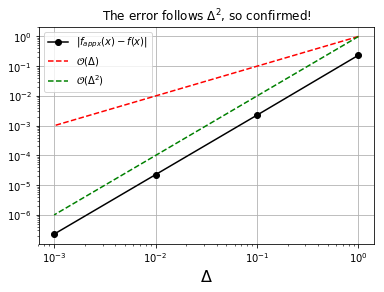

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x = 1.0
fpp_ref = np.exp(x) # fpp for "f prime prime"
Delta = np.logspace(0, -3, 4)
fpp_appx = np.zeros(len(Delta))
for i in range(len(Delta)):
    fpp_appx[i] = (np.exp(x+Delta[i])-2*np.exp(x)+np.exp(x-Delta[i]))/Delta[i]**2
plt.loglog(Delta, abs(fpp_appx-fpp_ref), 'k-o', label='$|f_{appx}''(x)-f''(x)|$')
plt.loglog(Delta, Delta, 'r--', label='$\mathcal{O}(\Delta)$')
plt.loglog(Delta, Delta**2, 'g--', label='$\mathcal{O}(\Delta^2)$')
plt.xlabel('$\Delta$', fontsize=16)
plt.legend()
plt.grid(True)
plt.title('The error follows $\Delta^2$, so confirmed!')
plt.show()

***

## Finite-Difference Approximations of Arbitrary Order

The finite-difference approximations explored were identified pretty easily by manipulating the Taylor series of a function.  Approximations that are higher order or that can be used for higher derivatives are somewhat more challenging to develop.

### Simple Rules

Generally, approximations that use values of $f$ at more values of $x$ (e.g., $x-\Delta$ and $x+\Delta$) are better than those that use fewer.  

*A more specific rule-of-thumb*: an $n$th-order approximation for the $m$th derivative requires that $f$ be evaluated at $n+m-1$ evenly-spaced $x$ values if those values are symmetric about $x$ (e.g., $x-\Delta$ and $x+\Delta$ as used for the central difference) or $n+m$ points, if the points are not symmetric about $x$ (e.g., $x-\Delta$ and $x$ as used for the backward difference).

> **Exercise**: Does the backward-difference approximation for $df/dx$ follow this rule?  

>> *Solution*: The backward-difference approximation for the first derivative ($m=1$) is first order ($n=1$).  The points are not symmetric about $x$.  Hence, the rule requires $m+n = 2$ points, consistent with the approximation. 

> **Exercise**: Does the forward-difference approximation for $df/dx$ follow this rule?  

> **Exercise**: Does the central-difference approximation for $df/dx$ follow this rule?  

> **Exercise**: Does the central-difference approximation for $d^2f/dx^2$ follow this rule?  

### Developing New Schemes

Finite-difference schemes of arbitrary order can always be determined directly from Taylor series, but the work involved can be tedious and requires intuition that one builds over time working with such schemes.  Hence, to develop such approximations from scratch is outside our scope, but we can turn again to SymPy for some help using its `as_finite_difference` function.  For example, we can recreate our forward difference scheme via

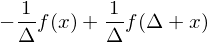

In [3]:
import sympy as sy
sy.init_printing()
f, x, Delta = sy.symbols('f x Delta')
fp = sy.diff(f(x), x)
fp.as_finite_difference([x, x+Delta])

The syntax is straightforward.  Given an expression `expr` that represents a derivative (e.g., `sy.diff(f(x), x)`), then `expr.as_finite_difference(list)` accepts a `list` of symbolic points.  To follow our development above, these points should be some subsequence of $x \pm i\Delta$ where $i = \ldots, -2, -1, 0, 1, 2, \ldots$.

***

**Exercise**:  Apply the rule-of-thumb to determine a third-order definition for $f'(x)$ and *verify the order* numerically.  (Hint: if the method is second order, that means it goes as $\Delta^2$.  Hence, a reduction of $\Delta$ by two should lead to what reduction in the error?)

*Solution*:  A quick attempt will show that the points $x-\Delta$, $x$, and $x+\Delta$ do not work. Can you work out why using the Taylor series from above?.  Alternatively, choose a fourth point $x+2\Delta$:

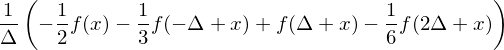

In [4]:
expr = fp.as_finite_difference([x-Delta, x, x+Delta, x+2*Delta]).simplify()
expr

In [5]:
from math import exp, log10
ref = exp(1)
err = lambda x, d: abs(ref - (-exp(x-d)/3-exp(x)/2+exp(x+d)-exp(x+2*d)/6)/d)
err_0_100 = err(1.0, 0.1)
err_0_010 = err(1.0, 0.01)
err_0_001 = err(1.0, 0.001)
"{:.3e} {:.3e} {:.3e}".format(err_0_100, err_0_010, err_0_001)

'2.360e-04 2.274e-07 2.271e-10'

Reduction of $\Delta$ by a a factor of 10 leads to a reduction in the error of approximately 1000 (i.e., $10^3$), exactly as expected if the error were proportional to $\Delta^3$.  To confirm, check the logarithm of each ratio:

In [6]:
log10(err_0_100/err_0_010), log10(err_0_010/err_0_001)

These values are very close to three, therefore confirming the third order expected.  Note that the second ratio is even closer to 3 than the first. Recall, the notion of order (here, $\mathcal{O}(\Delta^3)$) is defined specifically as $\Delta$ goes to zero.  Hence, only as $\Delta$ becomes very small will the $\Delta^3$ terms dominate, making any other contributions to the error appear to be negligible.

***

**Exercise**: Use `sympy.series` to show that that the finite-difference scheme $\frac{1}{\Delta} \left(- \frac{1}{2} f{\left (x \right )} - \frac{1}{3} f{\left (- \Delta + x \right )} + f{\left (\Delta + x \right )} - \frac{1}{6} f{\left (2 \Delta + x \right )}\right)$ is, in fact, third order.

***

**Exercise**: Develop a second-order finite-difference approximation for $d^3 f/dx^3$ using just four points and confirm its order numerically, graphically, or symbolically.

***

## Further Reading

None for now.